In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
#upload dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"]=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#Separate features and target variables
x = cancer.data
y = cancer.target

In [5]:
#split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
#evaluation
y_pred = dt.predict(x_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
acc

0.9649122807017544

In [9]:
#acc: 96%

In [10]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 59,   4],
       [  2, 106]])

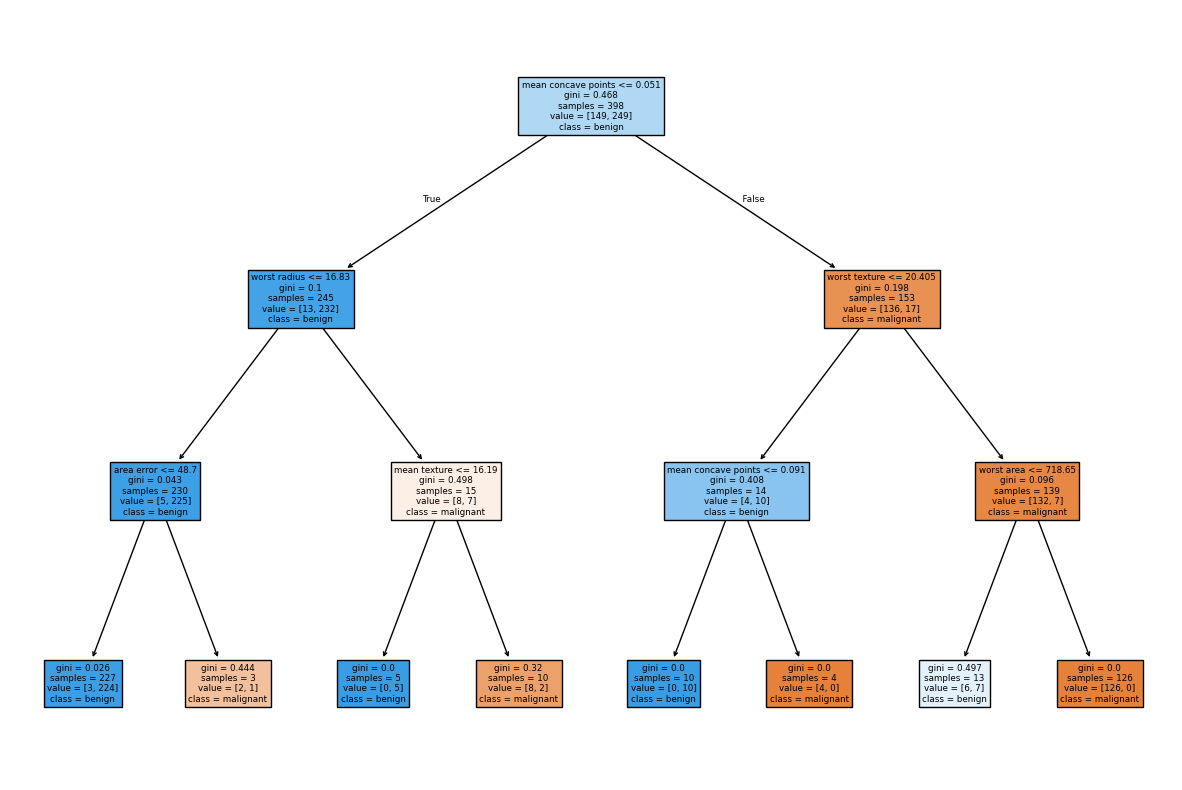

In [11]:
#dt visualization
plt.figure(figsize=(15,10))
plot_tree (dt, filled=True, feature_names = cancer.feature_names, class_names=list(cancer.target_names))
plt.show()


Dark blue / orange -> the model is certain of its decision, Gini is close to 0.
If it is light, there are still mixed data inside.
Gini = 0
All data in that box are of the same type.
The boxes at the very bottom are the final decisions.
Benign? Malignant?
It makes the prediction and finishes.

most important feature --> mean concave points,

Because it is the top-most feature.



In [12]:
feature_importances = dt.feature_importances_
feature_names = cancer.feature_names
feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)
for importance, feature_name in feature_importances_sorted:
  print(f"{feature_name}: {importance}")

mean concave points: 0.8099783964674019
worst texture: 0.06614479726915652
worst radius: 0.04348196570256628
worst area: 0.04031005602117941
mean texture: 0.02516886599037551
area error: 0.014915918549320378
worst symmetry: 0.0
worst smoothness: 0.0
worst perimeter: 0.0
worst fractal dimension: 0.0
worst concavity: 0.0
worst concave points: 0.0
worst compactness: 0.0
texture error: 0.0
symmetry error: 0.0
smoothness error: 0.0
radius error: 0.0
perimeter error: 0.0
mean symmetry: 0.0
mean smoothness: 0.0
mean radius: 0.0
mean perimeter: 0.0
mean fractal dimension: 0.0
mean concavity: 0.0
mean compactness: 0.0
mean area: 0.0
fractal dimension error: 0.0
concavity error: 0.0
concave points error: 0.0
compactness error: 0.0
